In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier 

Análise Exploratória dos Dados

In [2]:
data_location = "../Data/card_transdata.csv"
data = pd.read_csv(data_location, sep = ",")

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Verificando se há dados nulos

In [44]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [42]:
data.fraud.unique()

array([0., 1.])

In [ ]:
print('\nConjunto de dados, linhas e colunas\n')
print('The shape of the data set is:',data.shape)
print('\n---------------------------------------------\n')

print('\nCheck valores nulos\n')
print('Checking for missing values: \n')
print(pd.isnull(data).sum())
print('\n---------------------------------------------\n')

print('\nEstatísticas\n')
print(data.describe())
print('\n---------------------------------------------\n')

print('\nInformações do dataset\n')
print(data.info())
print('\n---------------------------------------------\n')

print('\nCheck balanceamento da target fraud\n')
print(data['fraud'].value_counts())
print('\n---------------------------------------------\n')


Conjunto de dados, linhas e colunas

The shape of the data set is: (1000000, 8)

---------------------------------------------


Check valores nulos

Checking for missing values: 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

---------------------------------------------


Estatísticas

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985  

Observando a distribuição dos dados

In [ ]:
#sns.pairplot(data, 
#             hue = 'fraud'
#            );

# Balanceamento da variável target

In [ ]:
data['fraud'].value_counts(normalize = True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

Verificamos que nesse conjunto apenas 8% dos dados são de cartões fraudados

Para resolver o problema do balanceamento vamos primeiramente criar dois datasets, um para os dados com frades e outro com dados sem fraude

In [ ]:
no_fraud=data[data.fraud == 0]
fraud=data[data.fraud == 1]

Pegando uma amostra de 5000 para cada cada dataset, com fraude e sem fraude

In [ ]:
dt_no_fraude_sample=no_fraud.sample(n=5000)
dt_fraude_sample=fraud.sample(n=5000)

Criação de um novo dataset com as amostras criadas anteriormente

In [ ]:
data_fraud=pd.concat([dt_no_fraude_sample,dt_fraude_sample],axis=0)

In [ ]:
data_fraud['fraud'].value_counts(normalize = True)

0.0    0.5
1.0    0.5
Name: fraud, dtype: float64

In [ ]:
data_fraud.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.026913,-0.069820,0.155561,-0.102862,-0.043150,0.064542,0.216411
distance_from_last_transaction,-0.026913,1.000000,-0.044541,-0.021275,-0.040518,-0.012168,0.025828,0.119792
ratio_to_median_purchase_price,-0.069820,-0.044541,1.000000,-0.046299,0.025519,-0.086158,0.146889,0.493802
repeat_retailer,0.155561,-0.021275,-0.046299,1.000000,-0.006902,0.001064,0.077268,-0.002439
used_chip,-0.102862,-0.040518,0.025519,-0.006902,1.000000,0.031601,-0.045095,-0.136841
used_pin_number,-0.043150,-0.012168,-0.086158,0.001064,0.031601,1.000000,-0.061161,-0.233194
online_order,0.064542,0.025828,0.146889,0.077268,-0.045095,-0.061161,1.000000,0.384189
fraud,0.216411,0.119792,0.493802,-0.002439,-0.136841,-0.233194,0.384189,1.000000


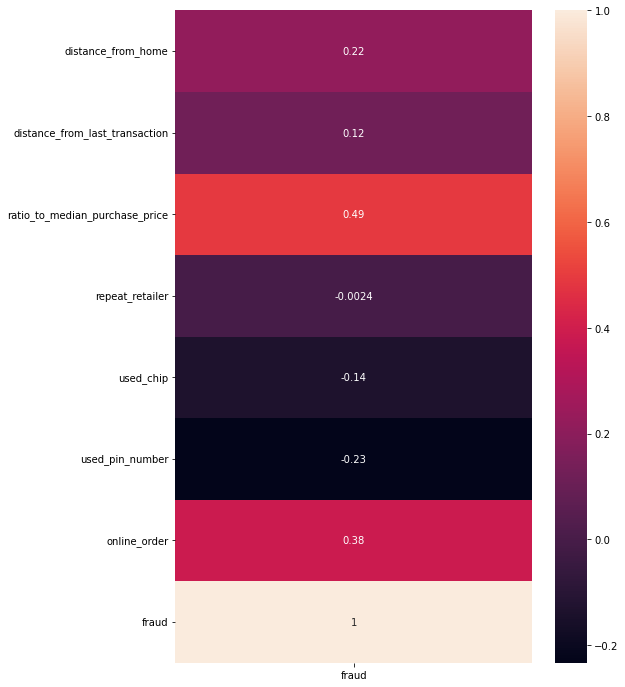

In [ ]:
plt.figure(figsize = (8,12))
sns.heatmap(data_fraud.corr()[['fraud']], 
            annot = True
           );

# Criação de uma lista vazia para armazenar as métricas dos modelos

In [ ]:
data_all=[]

# Definição das matriz features, variável varget - Sepração modelo treino e teste

Definindo a matriz de features e a variável target

In [ ]:
X = data_fraud.drop(columns=['fraud'],axis=1)
y = data_fraud["fraud"]

Split do dataset de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

Verificando se as proporções da variável target no treino e teste são correspondentes

In [ ]:
y_train.mean(), y_test.mean()

(0.5, 0.5)

Check dos dataset de treino e teste

In [ ]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (7500, 7)
y_train: (7500,)
X_test: (2500, 7)
y_test: (2500,)


# Padronização das features do modelos de treino e de teste

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo 1: Regressão Logística

Instanciando um objeto da classe LogisticRegression

In [ ]:
lr = LogisticRegression()

Ajuste do modelo

In [ ]:
lr.fit(X_train_std, y_train)

LogisticRegression()

Visualização dos coeficientes

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[ 3.4598872   2.00808103  6.34687287 -0.56071453 -0.65824867 -3.3566293
   1.95985452]]
[0.26845554]


Previsão da acurácia com o modelo treinado

In [ ]:
score_train = accuracy_score(y_train, lr.predict(X_train_std))
print('Score train: ', score_train)

Score train:  0.938


Matriz de confusão do modelo de treino

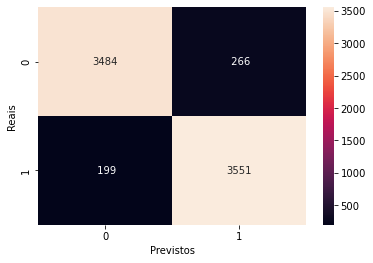

In [ ]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%, dos 3750 casos positivos de fraud 3588 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 95% das detecções de fraudes são positivas.

Previsão da acurácia com o modelo de teste

In [ ]:
y_test_pred = lr.predict(X_test_std)

Acurácia do modelo de teste

In [ ]:
score_test = accuracy_score(y_test, y_test_pred)
print('Score test: ', score_test)

Score test:  0.9376


Matriz de confusão do modelo de teste

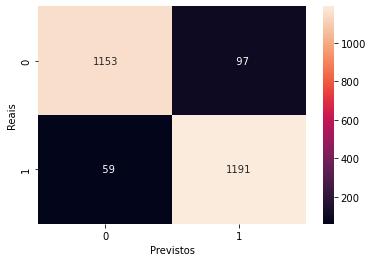

In [ ]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%, dos 1250 casos positivos de fraud 1188 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 95% das detecções de fraudes são positivas.

Métricas do modelo de teste

In [ ]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       0.95      0.92      0.94      1250
     Fraud 1       0.92      0.95      0.94      1250

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



Inserindo as métricas na lista para armazenamento

In [ ]:
m='Logistic Regression'
test_recall_lr = recall_score(y_test, y_test_pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)
test_auc_lr = auc(fpr,tpr)
f1_score_lr = f1_score(y_test, y_test_pred)

In [ ]:
data_all.append([m,score_train,score_test,test_recall_lr,test_auc_lr,f1_score_lr])

# Modelo 2: Randon Forest

In [ ]:
rf=RandomForestClassifier()

Treino do modelo usando os conjuntos de treinamento y_pred=clf.predict(X_test)

In [ ]:
rf.fit(X_train_std, y_train)

RandomForestClassifier()

In [ ]:
score_train = accuracy_score(y_train, rf.predict(X_train_std))
print('Score train: ', score_train)

Score train:  1.0


In [ ]:
y_test_pred = rf.predict(X_test_std)

In [ ]:
score_test = accuracy_score(y_test, y_test_pred)
print('Score test: ', score_test)

Score test:  0.9996


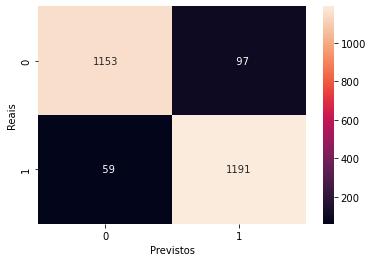

In [ ]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

In [ ]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       1.00      1.00      1.00      1250
     Fraud 1       1.00      1.00      1.00      1250

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [ ]:
m='Randon Forest'
test_recall = recall_score(y_test, y_test_pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)
test_auc = auc(fpr,tpr)
f1_score = f1_score(y_test, y_test_pred)

In [ ]:
data_all.append([m,score_train,score_test,test_recall,test_auc,f1_score])

#  DEIXAR ESSE PARA FINAL, OS MODELOS DEVEM SER INSERIDOS ANTES DAQUI
Transformando a lista de métricas num dataframe e imprimindo as informações de todos modelos

In [ ]:
models=['LogReg','RanFor']
pd_scores=pd.DataFrame(data_all,columns=['model','train score','test score','test recall','test_auc','F1 Score'])
print(pd_scores)

                 model  train score  test score  test recall  test_auc  \
0  Logistic Regression        0.938      0.9376       0.9528    0.9376   
1        Randon Forest        1.000      0.9996       1.0000    0.9996   

   F1 Score  
0  0.938534  
1  0.999600  


Modelo 3: MOdelo Gaussian Naive Bayes